## Monte Carlo Simulation

The Monte Carlo method is a statistical technique that uses random sampling to simulate possible outcomes and estimate probabilities.
It helps to analyze uncertainty and risks in a process.


Minimum data required:
It is recommended to have at least 10 historical data points. With fewer than 10, the simulation may not be reliable.

In this case we have the creation of replacement parts (units/week), the sales of tickets for events (tickets_sold/hour) and
work velocity of an agile team, measured in User_Story/sprint.


In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

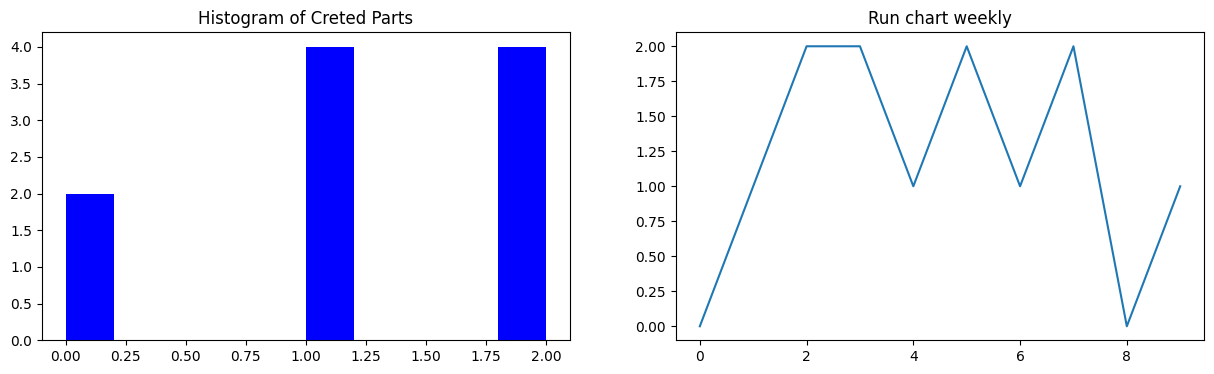


Sample Size:  10
Mean:  1.2
Standard Deviation:  2.37


In [ ]:
# Working first with the creation of replacement parts

parts_created = [0, 1, 2 ,2 ,1 ,2 ,1, 2, 0, 1]
fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(parts_created, bins=10, density=False, cumulative=False, color='b')
ax[0].set_title('Histogram of Creted Parts')
ax[1].plot(parts_created)
ax[1].set_title('Run chart weekly')
plt.show()

# Statistics
n= np.size(parts_created)
media = np.mean(parts_created)
sigma = np.std(parts_created, ddof=n-1)

print('\nSample Size: ', n)
print('Mean: ', media)
print(f'Standard Deviation: {sigma: 4.2f}')

We only hace 10 samples, so to have more simulated data, we are using the Montecarlo Method. 

### Step 1
Defining the parameters of simulation


In [16]:
w = 5 # Number of weeks to simulate
m = 10000 # Number of simulations to do on 's' weeks

## Step 2
For each simulation of 5 weeks of production, we will spin a virtual roulette wheel that has 10 slots — one for each week of historical data in our example.
Depending on the value obtained from the wheel [0:10], we will retrieve the corresponding production value from our historical data.
For example, if the roulette gives us a 3, we will take the production value from position 3 in the historical dataset — let's say that's 2 units produced.

The results obtained from each 5-week simulation are then summed up (representing the total production for those 5 weeks) and stored in a list that contains the total production for all simulations.

In [18]:
total = [] # List to save the sum of the simulation of the w weeks
for _ in range(0, m):
    sum = 0
    for _ in range(0, w):
        # spinning the roulette
        r = random.randint(0, n - 1)
        sum +=  parts_created[r]
    total.append(sum)

print(f'The production for 10000 simulations are:')
print(f'Week 1: \t{total[0]}')
print(f'Week 2: \t{total[1]}')
print(f'Week 3: \t{total[2]}')
print('...')
print(f'Week 10000: \t{total[-1]}\n')

print(f'Mean of the simulations: \t{np.mean(total)}')
print(f'Standard Deviation of the simulations: \t{np.std(total)}')


The production for 10000 simulations are:
Week 1: 	5
Week 2: 	7
Week 3: 	6
...
Week 10000: 	6

Mean of the simulations: 	6.0058
Standard Deviation of the simulations: 	1.675340669834049


## Step 4
Let's Graph the Probability Distribution of the 10.000 Simulations

The most common values are 6 next 5 and 7 

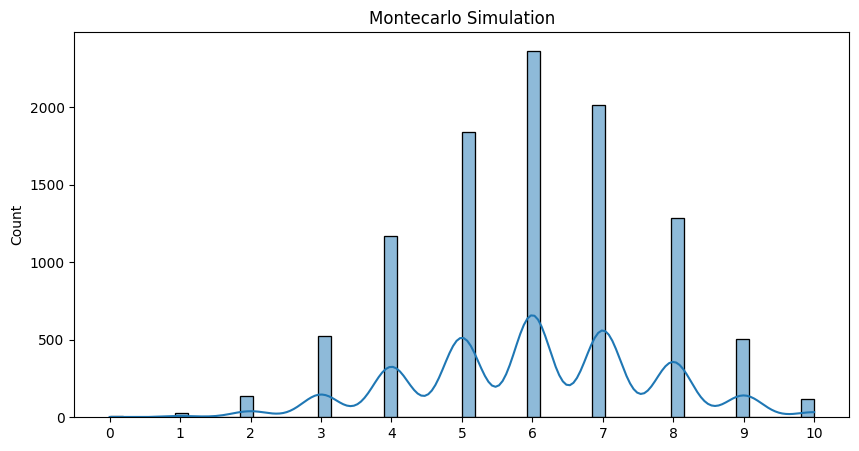

In [19]:
plt.figure(figsize=(10, 5))
plt.title('Montecarlo Simulation')
sns.histplot(data=total, kde=True)
plt.xticks(range(0,11))
plt.show()

The **Central Limit Theorem (CLT)** states that, regardless of the original distribution of the data (in our case, the weekly production), the distribution of the sample means tends to approach a normal distribution as the sample size increases.

In this example, we can also conclude that the sum of the samples behaves similarly and tends to follow the same distribution.
This is a practical application of the CLT, showing how we can use historical production data to simulate possible future scenarios using the Monte Carlo method.

## Step 5 
if someone says that we can get the total of replacements parts per week just mupliplying the mean per day for the 5 days (1.2 * 5 = 6) but the probability of that is:

In [20]:
print(f'Probability to do 6 parts per week: {total.count(6)/m}')

Probability to do 6 parts per week: 0.2366


That's too low, but we can assure an 85% of probability calculating with percentiles to avoid risks

In [21]:
percentile = 15
minimum_value = np.percentile(total, percentile)
precision = 100-percentile
print(f"We can assure with an {precision}% that the minimum amount of replacement parts that can be done in a week is: {minimum_value}")

We can assure with an 85% that the minimum amount of replacement parts that can be done in a week is: 4.0
